In [5]:
from sklearn.datasets import load_iris


In [6]:
iris_dataset = load_iris()

In [7]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris_dataset.data.shape

(150, 4)

In [9]:
iris_dataset.target.shape

(150,)

In [10]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
# There are 4 features for each datapoint and there are overall 3 labels(classes)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25)

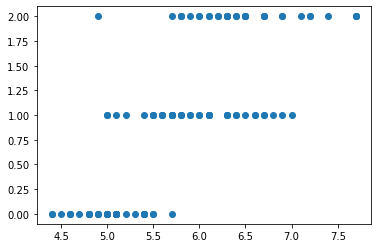

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], y_train)

In [16]:
X_train.shape


(112, 4)

In [17]:
y_train.shape

(112,)

In [18]:
X_train[:, 0].shape

(112,)

In [20]:
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,2.5,4.5,1.7
1,5.4,3.4,1.5,0.4
2,5.8,2.7,5.1,1.9
3,6.4,3.2,4.5,1.5
4,6.0,3.4,4.5,1.6
...,...,...,...,...
107,4.5,2.3,1.3,0.3
108,4.4,3.2,1.3,0.2
109,4.9,3.0,1.4,0.2
110,5.8,2.6,4.0,1.2


In [21]:
type(X_train)

numpy.ndarray

In [22]:
type(iris_df)

pandas.core.frame.DataFrame

In [23]:
iris_df.shape

(112, 4)

In [38]:
import seaborn as sns

y = pd.Series(y_train, name="result")


In [41]:
iris_df = pd.concat([iris_df, y], axis=1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,4.9,2.5,4.5,1.7,2
1,5.4,3.4,1.5,0.4,0
2,5.8,2.7,5.1,1.9,2
3,6.4,3.2,4.5,1.5,1
4,6.0,3.4,4.5,1.6,1
...,...,...,...,...,...
107,4.5,2.3,1.3,0.3,0
108,4.4,3.2,1.3,0.2,0
109,4.9,3.0,1.4,0.2,0
110,5.8,2.6,4.0,1.2,1


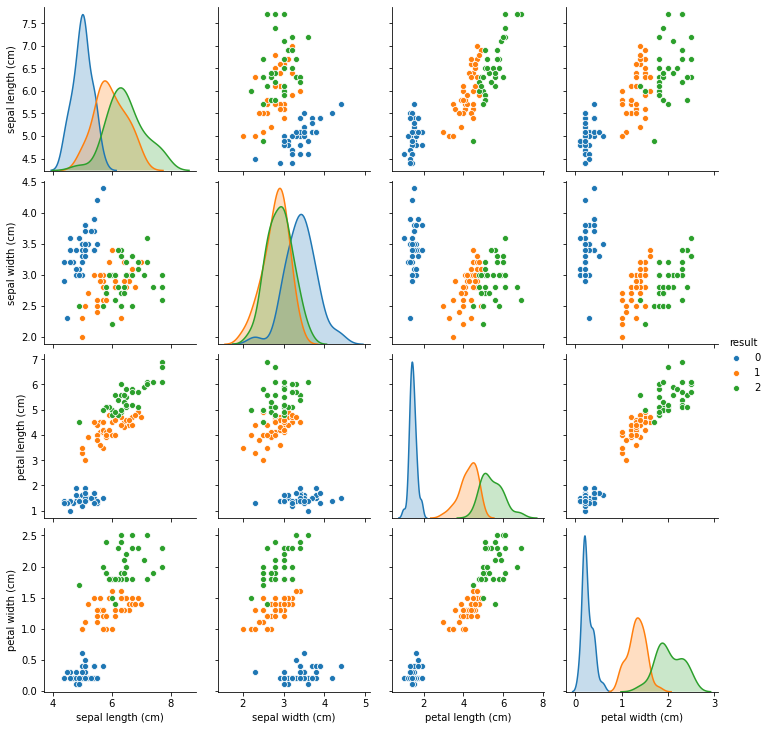

In [42]:
sns.pairplot(iris_df, hue="result")

## KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [55]:
import numpy as np

X_new = np.array([[1, 2, 4, 3]])
X_new.shape

(1, 4)

In [56]:
p = model.predict(X_new)

In [57]:
iris_dataset['target_names'][p]

array(['versicolor'], dtype='<U10')

In [58]:
y_pred = model.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [59]:
model.score(X_test, y_test)

0.9736842105263158